### Installation and Importing Libraries

In [1]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import gzip
import json
import csv
import pickle
import re
from unidecode import unidecode
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import unicodedata
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### Collecting data from the JSON file

In [6]:
def parse(path):
    with open(path, 'r') as f:
        for line in f:
            yield json.loads(line)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
# reviews_data = getDF("/kaggle/input/assignment3/Electronics_5.json/Electronics_5.json")

In [6]:
# reviews_data.head()

In [7]:
# with open('reviews_data.pkl', 'wb') as f:
#     pickle.dump(reviews_data, f)

In [3]:
with open('/kaggle/input/reviews/reviews_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [9]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [10]:
# metadata = getDF("/kaggle/input/assignment3/meta_Electronics.json/meta_Electronics.json")

In [11]:
# metadata.head()

In [12]:
# with open('metadata.pkl', 'wb') as f:
#     pickle.dump(metadata, f)

In [5]:
with open('/kaggle/input/metadata/metadata.pkl', 'rb') as f:
    metadata_df = pickle.load(f)

In [14]:
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN


### Data containing Headphones as the product

In [6]:
# Filter rows containing 'headphones' in the title
headphones_data = metadata_df[metadata_df['title'].str.contains('headphone', case=False, na=False)]

In [16]:
headphones_data

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
8,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Wireless Bluetooth Headphones Earbuds with Mic...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[>#950 in Cell Phones & Accessories (See Top 1...,[],Home Audio & Theater,,"October 23, 2017",$7.99,0132492776,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
47,"[Electronics, Headphones]",,[Use these high quality headphones for interne...,,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],,Polaroid,"[Ideal for PC Internet chatting, PC / Console ...","[>#3,548,269 in Cell Phones &amp; Accessories ...",[],All Electronics,,"December 13, 2012",,0558835155,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
132,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#4,626,934 in Cell Phones & Accessories (See...",[],Home Audio & Theater,,"December 28, 2015",,0692206280,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
223,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#2,654,020 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"October 18, 2015",,0983629269,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
229,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#5,289,289 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"April 26, 2013",,0985262788,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786395,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>Specification</b></br> Driver: 5mm</br> ...",,MAXROCK Noise Isolating Sleeping Headphones Ea...,[],,MAXROCK,"[Unique patented silicone design headphones, s...","[>#21,087 in Musical Instruments (See Top 100 ...","[B071WRSL38, B00XCDOGY8, B00V9FN1R4, B00SRAV6V...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",,B01HJAVYDU,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786400,"[Electronics, Accessories & Supplies, Audio & ...",,"[, <b>Compatible Headphones:</b><br>- SONY MDR...",,Geekria&reg; ELITE Headphone Shoulder Bag / Ca...,[],,Geekria,"[Saffiano Leather, lightweight and fashionable...","[>#4,760 in Electronics > Accessories & Suppli...","[B0796LWMCR, B019Z81V3M, B00TBELD02, B01CJJ2IF...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...",,$1.86,B01HJA2TV6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786404,"[Electronics, Headphones, Earbud Headphones]",,[About the product Rhapsody & Mogan H9 is a m...,,"Wireless Bluetooth Headset, HandsFree Wireless...",[],,snorain,[COMFORTABLE CUSTOM FIT Rhapsody & Mogan nois...,"[>#343,752 in Cell Phones & Accessories (See T...","[B01D3QZB2Y, B079GFF4HZ, B00XBZY0EI, B00S2P0M1...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",,B01HJAPNHI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786405,"[Electronics, Headphones,

### Total Rows

In [10]:
# Report the total number of rows for headphones
total_rows = headphones_data.shape[0]
print("Total number of rows for headphones:", total_rows)

Total number of rows for headphones: 27412


In [7]:
# headphones_data.to_csv('headphone_data.csv', index=False, escapechar='\\')
# Read the CSV file back into a DataFrame
headphone_data = pd.read_csv('/kaggle/input/headphone/headphone_data.csv')

### Preprocessing

In [8]:
# Handle missing values 
headphone_data.fillna('Unknown', inplace=True)

# Remove duplicates 
headphone_data.drop_duplicates(inplace=True)

print("Total number of rows after pre-processing for headphones:", headphone_data.shape[0])

Total number of rows after pre-processing for headphones: 26865


### Descriptive Statistics of Headphones

In [14]:
merged_df = pd.merge(df, headphone_data, on='asin', how='inner')
# Number of Reviews
num_reviews = merged_df.shape[0]

# Average Rating Score
avg_rating_score = merged_df['overall'].mean()

# Number of Unique Products
num_unique_products = merged_df['asin'].nunique()

# Number of Good Ratings
num_good_ratings = merged_df[merged_df['overall'] >= 3].shape[0]

# Number of Bad Ratings
num_bad_ratings = merged_df[merged_df['overall'] < 3].shape[0]

# Number of Reviews corresponding to each Rating
rating_counts = merged_df['overall'].value_counts().sort_index()
print("Descriptive Statistics:")
print(f"a. Number of Reviews: {num_reviews}")
print(f"b. Average Rating Score: {avg_rating_score:.2f}")
print(f"c. Number of Unique Products: {num_unique_products}")
print(f"d. Number of Good Ratings: {num_good_ratings}")
print(f"e. Number of Bad Ratings: {num_bad_ratings}")
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)

Descriptive Statistics:
a. Number of Reviews: 411201
b. Average Rating Score: 4.11
c. Number of Unique Products: 8064
d. Number of Good Ratings: 353401
e. Number of Bad Ratings: 57800
f. Number of Reviews corresponding to each Rating:
overall
1.0     31009
2.0     26791
3.0     40760
4.0     79153
5.0    233488
Name: count, dtype: int64


In [15]:
# Download necessary NLTK resources
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
nltk.download('punkt')
nltk.download('wordnet')

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

True

### Preprocessing the Text

In [16]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a string or bytes-like object
    if isinstance(text, str):
        # Text Normalizer
        text = text.lower()
        
        # Remove HTML tags
        # text = re.sub(r'<[^>]+>', '', text)
        clean = re.compile('<.*?>')
        text = re.sub(clean, '', text)
        
        # Remove accented characters
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        
        # expand contractions in text
        text = contractions.fix(text)
        
        # remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize text
        tokens = word_tokenize(text)
        
        # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into text
        preprocessed_text = ' '.join(lemmatized_tokens)
        
        return preprocessed_text
    else:
        return text

In [17]:
# Apply preprocessing to text columns in DataFrame
merged_df['reviewText'] = merged_df['reviewText'].apply(preprocess_text)
merged_df['summary'] = merged_df['summary'].apply(preprocess_text)

In [25]:
merged_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphone it is just the cord is too short,five star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
1,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like these headphone wanted something f...,officewear,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
2,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire to headphone broke off in le than a month...,for the money they are fine just hope they hol...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
3,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,very good,three star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
4,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently returning this product because the s...,currently returning this product because the s...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown


### Relevant Statistics and EDA

Top 20 Most Reviewed Brands:
brand
Sony              28512
Sennheiser        19239
Bose              10027
JVC                7187
Audio-Technica     6670
Etre Jeune         5895
Mpow               5566
Panasonic          5356
iNassen            5354
Philips            5322
Bluedio            5315
EldHus             5055
Koss               4633
MEE audio          4486
Symphonized        4285
XBRN               4245
TaoTronics         4082
V-MODA             4079
Beats              3916
Plantronics        3620
Name: count, dtype: int64

Top 20 Least Reviewed Brands:
brand
Rockford Fosgate           5
ESTAVEL                    5
Iseason                    5
California Cable Market    5
Viotek                     5
ATEX                       5
DESHENG                    5
Unpluggify                 5
LAFEINA                    5
Komingo                    5
Targus                     5
AWMCY                      5
Tt eSPORTS                 5
APG                        5
Oduo            

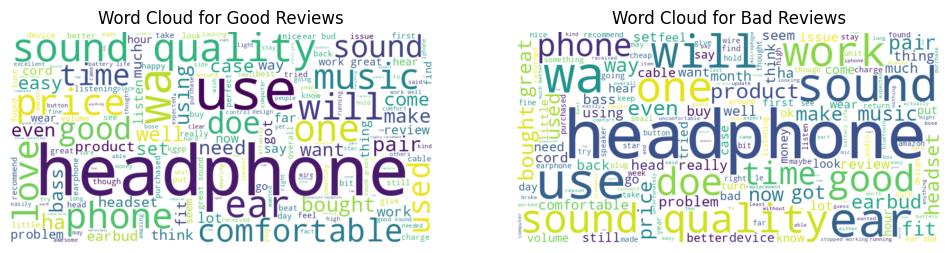

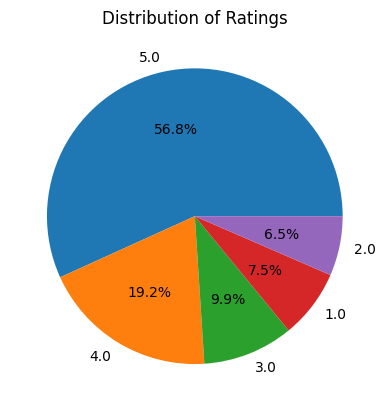


Year with Maximum Reviews: 2016

Year with the Highest Number of Customers: 2016


In [18]:
# Top 20 most reviewed brands
top_20_most_reviewed_brands = merged_df['brand'].value_counts().head(20)

# Top 20 least reviewed brands
top_20_least_reviewed_brands = merged_df['brand'].value_counts().tail(20)

# Most positively reviewed 'Headphone' (if available)
# Filter the DataFrame for 'Headphone' category
headphone_data = merged_df[merged_df['category'].str.contains('Headphone', case=False, na=False)]
# Group by 'asin' and calculate the mean of 'overall' ratings
average_ratings = headphone_data.groupby('asin')['overall'].mean()
# Find the 'asin' with the highest average rating
most_positively_reviewed_asin = average_ratings.idxmax()
filtered_data = merged_df[merged_df['asin'] == most_positively_reviewed_asin]
result = filtered_data.iloc[0]
result = result[['title', 'brand']]

# Count of ratings over 5 consecutive years
merged_df['year'] = pd.to_datetime(merged_df['reviewTime']).dt.year
ratings_over_5_years = merged_df.groupby('year')['overall'].count().tail(5)

# Word Cloud for 'Good' and 'Bad' ratings
good_reviews = merged_df[merged_df['overall'] > 3]['reviewText'].str.cat(sep=' ')
bad_reviews = merged_df[merged_df['overall'] <= 3]['reviewText'].str.cat(sep=' ')

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

# Year with maximum reviews
year_with_max_reviews = merged_df['year'].value_counts().idxmax()

# Year with the highest number of customers
year_with_highest_customers = merged_df.groupby('year')['reviewerID'].nunique().idxmax()

# Displaying the results
print("Top 20 Most Reviewed Brands:")
print(top_20_most_reviewed_brands)
print("\nTop 20 Least Reviewed Brands:")
print(top_20_least_reviewed_brands)
print("\nMost Positively Reviewed Headphone:")
print("Title: " + result['title'])
print("Brand: " + result['brand'])
print("\nCount of Ratings Over 5 Consecutive Years:")
print(ratings_over_5_years)
print("\n\n")

# Displaying word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')
plt.show()

print("\n\n")
# Pie chart for Distribution of Ratings vs. No. of Reviews
rating_distribution = merged_df['overall'].value_counts()
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

print("\nYear with Maximum Reviews:", year_with_max_reviews)
print("\nYear with the Highest Number of Customers:", year_with_highest_customers)

### Feature Engineering Technique: Word2Vec

In [19]:
# Convert ratings into categories
def label_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply label_rating_class function to create the target variable
merged_df['rating_class'] = merged_df['overall'].apply(label_rating_class)

# Drop rows with missing values in the 'reviewText' column
merged_df.dropna(subset=['reviewText'], inplace=True)

# Split the data into features (X) and target variable (y)
X = merged_df['reviewText']
y = merged_df['rating_class']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Tokenize the text data
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Transform the training data using Word2Vec embeddings
X_train_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train_tokens])

# Transform the testing data using Word2Vec embeddings
X_test_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test_tokens])

# Check the shapes of the transformed data
print("Training data shape after Word2Vec transformation:", X_train_word2vec.shape)
print("Testing data shape after Word2Vec transformation:", X_test_word2vec.shape)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape after Word2Vec transformation: (308360, 100)
Testing data shape after Word2Vec transformation: (102787, 100)
Training data shape: (308360,) (308360,)
Testing data shape: (102787,) (102787,)


### Evaluation Metrics

In [17]:
# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(), max_iter=1000)
}

# Loop over each model
for name, model in models.items():
    print(f"Model: {name}")
    # Train the model
    model.fit(X_train_word2vec, y_train)
    # Make predictions
    y_pred = model.predict(X_test_word2vec)
    # Print classification report
    print(classification_report(y_test, y_pred))

Model: Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Average       0.36      0.05      0.09     10256
         Bad       0.66      0.48      0.56     14438
        Good       0.83      0.97      0.90     78093

    accuracy                           0.81    102787
   macro avg       0.62      0.50      0.52    102787
weighted avg       0.76      0.81      0.77    102787

Model: KNN
              precision    recall  f1-score   support

     Average       0.25      0.15      0.19     10256
         Bad       0.57      0.40      0.47     14438
        Good       0.84      0.93      0.88     78093

    accuracy                           0.78    102787
   macro avg       0.55      0.49      0.51    102787
weighted avg       0.74      0.78      0.76    102787

Model: Decision Tree
              precision    recall  f1-score   support

     Average       0.22      0.24      0.23     10256
         Bad       0.41      0.42      0.41     14438
        Good       0.85      0.83      0.84

### Collaborative Filtering

In [20]:
### Trial 1 : Chunking Method 


# # df.to_csv('original.csv', index=False, escapechar='\\')
# # df = pd.read_csv('original.csv')

# # # Step 2: Handle missing values 
# df.fillna('Unknown', inplace=True)

# # Remove duplicates 
# df.drop_duplicates(inplace=True)

# # Define chunk size
# chunk_size = 10000

# # Split the DataFrame into chunks
# chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# # Iterate over the chunks
# for i, chunk in enumerate(chunks):
#     # Store each chunk in a pickle file
#     with open(f"chunk_{i}.pkl", "wb") as f:
#         pickle.dump(chunk, f)
        
# # Path to the directory containing the pickle files
# directory_path = '/kaggle/working/'

# # Initialize an empty DataFrame to store the user-item rating matrix
# user_item_matrix = pd.DataFrame()

# # Iterate over each file in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith('.pkl'):  # Check if the file is a pickle file
#         file_path = os.path.join(directory_path, filename)
#         # Load the chunk from the pickle file
#         with open(file_path, "rb") as f:
#             chunk = pickle.load(f)
#         # Pivot the chunk to create a user-item rating matrix for the current chunk
#         chunk_matrix = chunk.pivot(index='asin', columns='reviewerID', values='overall')
#         # Merge the chunk matrix with the existing user-item rating matrix
#         user_item_matrix = pd.concat([user_item_matrix, chunk_matrix], axis=1, sort=False)

# # Display the user-item rating matrix
# print(user_item_matrix)

### Trial 2 : k-Fold Method


In [4]:
import pandas as pd
from sklearn.model_selection import KFold
import torch

In [5]:
# Define the number of folds (K)
k = 20

# Initialize the KFold splitter
# kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf = KFold(n_splits=k, shuffle=False)

# Initialize a dictionary to store train and val sets for each fold
fold_data = {}

# Iterate over the splits
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and validation sets for this fold
    train_set = df.iloc[train_idx]
    val_set = df.iloc[val_idx]

    # Store train and val sets in the dictionary
    fold_data[fold_idx + 1] = {'train': train_set, 'val': val_set}

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:
Fold 11:
Fold 12:
Fold 13:
Fold 14:
Fold 15:
Fold 16:
Fold 17:
Fold 18:
Fold 19:
Fold 20:


In [6]:
train_set = fold_data[1]['train']
val_set = fold_data[1]['val']

users, products = val_set["reviewerID"].unique(), val_set["asin"].unique()
users, products = sorted(users), sorted(products)

# Reverse Mapping
usr_idx, prod_idx = dict(), dict()
for idx, usr in enumerate(users): usr_idx[usr] = idx
for idx, prod in enumerate(products): prod_idx[prod] = idx

h, w = len(users), len(products)

# Create a user-item rating matrix
rating_matrix = torch.zeros((h, w), dtype=torch.float16)

# Filling data
for row_idx, row in val_set.iterrows():
    usr, prod = row["reviewerID"], row["asin"]
    rating = row["overall"]
    y, x = usr_idx[usr], prod_idx[prod]
    rating_matrix[y][x] = rating


In [ ]:
import numpy as np

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

# Calculate similarity matrix
def calculate_similarity_matrix(rating_matrix):
    num_users = rating_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    
    for i in range(num_users):
        for j in range(num_users):
            similarity_matrix[i, j] = cosine_similarity(rating_matrix[i], rating_matrix[j])
    
    return similarity_matrix

# Calculate similarity matrix
similarity_matrix = calculate_similarity_matrix(rating_matrix)

# # Print similarity matrix
# print("Similarity matrix:")
# print(similarity_matrix)

In [ ]:
import scipy.sparse
from sklearn.metrics.pairwise import cosine_similarity

# Convert rating_matrix to sparse matrix format
sparse_rating_matrix = scipy.sparse.csr_matrix(rating_matrix)

# Calculate cosine similarity using sparse matrix representation
similarity_matrix = cosine_similarity(sparse_rating_matrix, dense_output=False)


In [ ]:
# Initialize dictionaries to store user and product indices
usr_idx = {}
prod_idx = {}

# Populate user and product indices dictionaries
for idx, usr in enumerate(users):
    usr_idx[usr] = idx

for idx, prod in enumerate(products):
    prod_idx[prod] = idx

# Initialize a list to store absolute differences
absolute_diffs = []

# Iterate over each user-item pair in the validation set
for _, row in val_set.iterrows():
    usr, prod, actual_rating = row['reviewerID'], row['asin'], row['overall']
    
    # Check if the user and product are in the user-item rating matrix
    if usr in usr_idx and prod in prod_idx:
        usr_idx_val = usr_idx[usr]
        prod_idx_val = prod_idx[prod]
        predicted_rating = rating_matrix[usr_idx_val, prod_idx_val]
        absolute_diff = abs(predicted_rating - actual_rating)
        absolute_diffs.append(absolute_diff)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(absolute_diffs)
print("Mean Absolute Error (MAE):", mae)



In [ ]:
import numpy as np

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

# Function to calculate the similarity matrix
def calculate_similarity_matrix(rating_matrix):
    num_users = rating_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    
    for i in range(num_users):
        for j in range(num_users):
            similarity_matrix[i, j] = cosine_similarity(rating_matrix[i], rating_matrix[j])
    
    return similarity_matrix

# Function to predict ratings using nearest neighbors
def predict_rating(rating_matrix, similarity_matrix, usr_idx, prod_idx, k=10):
    num_users = rating_matrix.shape[0]
    predicted_ratings = np.zeros(num_users)
    
    for i in range(num_users):
        # Get indices of top k similar users
        sim_users_indices = np.argsort(similarity_matrix[i])[::-1][:k]
        
        # Compute weighted average of ratings from similar users
        total_similarity = 0
        weighted_sum = 0
        for j in sim_users_indices:
            if rating_matrix[j, prod_idx] != 0:  # Only consider if user j has rated the product
                sim = similarity_matrix[i, j]
                total_similarity += sim
                weighted_sum += sim * rating_matrix[j, prod_idx]
        
        if total_similarity != 0:
            predicted_ratings[i] = weighted_sum / total_similarity
    
    return predicted_ratings

# Function to calculate MAE
def calculate_mae(predicted_ratings, actual_ratings):
    absolute_diffs = np.abs(predicted_ratings - actual_ratings)
    mae = np.mean(absolute_diffs)
    return mae

# Initialize list to store MAE values for different k values
mae_values = []

# Iterate over different values of k (number of neighbors)
for k in [20, 30, 40, 50]:
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(rating_matrix)
    
    # Predict ratings for validation set
    predicted_ratings = []
    for _, row in val_set.iterrows():
        usr, prod, actual_rating = row['reviewerID'], row['asin'], row['overall']
        usr_idx_val = usr_idx.get(usr, None)
        prod_idx_val = prod_idx.get(prod, None)
        if usr_idx_val is not None and prod_idx_val is not None:
            predicted_rating = predict_rating(rating_matrix, similarity_matrix, usr_idx_val, prod_idx_val, k=k)
            predicted_ratings.append(predicted_rating)
    
    # Calculate MAE
    predicted_ratings = np.array(predicted_ratings)
    actual_ratings = val_set['overall'].values
    mae = calculate_mae(predicted_ratings, actual_ratings)
    mae_values.append((k, mae))

# Print MAE values for different values of k
for k, mae in mae_values:
    print(f"MAE for {k} nearest neighbors:", mae)

In [ ]:
### Trail 3 : k-Fold Method over Merged_df (Sampled Dataset)



# # Initialize an empty dictionary to store reviewer-product ratings
# reviewer_product_ratings = {}

# # Iterate over each row in the DataFrame
# for index, row in merged_df.iterrows():
#     reviewer_id = row['reviewerID']
#     product_id = row['asin']
#     rating = row['overall']
    
#     # Check if reviewer_id already exists in the dictionary
#     if reviewer_id in reviewer_product_ratings:
#         # If yes, update the ratings for the corresponding product
#         reviewer_product_ratings[reviewer_id][product_id] = rating
#     else:
#         # If not, create a new entry for the reviewer and their ratings
#         reviewer_product_ratings[reviewer_id] = {product_id: rating}

In [ ]:
# # Get unique reviewer IDs and product IDs
# reviewer_ids = sorted(list(reviewer_product_ratings.keys()))
# product_ids = sorted(set(product_id for ratings in reviewer_product_ratings.values() for product_id in ratings.keys()))

# # Create a user-item rating matrix filled with NaNs
# num_reviewers = len(reviewer_ids)
# num_products = len(product_ids)
# rating_matrix = np.empty((num_reviewers, num_products))
# rating_matrix[:] = np.nan

# # Populate the rating matrix with ratings from the dictionary
# for i, reviewer_id in enumerate(reviewer_ids):
#     ratings = reviewer_product_ratings[reviewer_id]
#     for j, product_id in enumerate(product_ids):
#         if product_id in ratings:
#             rating_matrix[i, j] = ratings[product_id]

# # # Display the rating matrix
# # print("User-Item Rating Matrix:")
# # print(rating_matrix)

In [ ]:
# Display the first few entries of the dictionary
for reviewer_id, product_ratings in list(reviewer_product_ratings.items())[:5]:
    print(reviewer_id, ":", product_ratings)


import pandas as pd
from sklearn.model_selection import KFold

# Define the number of folds (K)
k = 5

# Initialize the KFold splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over the splits
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(merged_df)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and validation sets for this fold
    train_set = merged_df.iloc[train_idx]
    val_set = merged_df.iloc[val_idx]
    
    # Perform further operations with the train_set and val_set as needed

In [ ]:
# Initialize an empty dictionary to store user-item ratings
user_item_ratings = {}

# Iterate over the rows in the training set
for _, row in train_set.iterrows():
    reviewerID = row['reviewerID']
    asin = row['asin']
    overall = row['overall']
    
    # If the reviewerID is not in the dictionary, create a new entry
    if reviewerID not in user_item_ratings:
        user_item_ratings[reviewerID] = {}
    
    # Store the rating for the corresponding item
    user_item_ratings[reviewerID][asin] = overall

# Create a DataFrame from the dictionary
user_item_matrix = pd.DataFrame.from_dict(user_item_ratings, orient='index')

# Replace missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Display the user-item rating matrix
print("User-Item Rating Matrix:")
print(user_item_matrix)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Step 1: Define functions to calculate cosine similarity and k-nearest neighbors
def cosine_similarity_matrix(matrix):
    similarity = cosine_similarity(matrix)
    np.fill_diagonal(similarity, 0)  # Set diagonal elements to 0 to avoid self-similarity
    return similarity

def k_nearest_neighbors(similarity_matrix, k):
    return np.argsort(similarity_matrix)[:, ::-1][:, 1:k+1]

# Step 2: Define function to predict missing values using collaborative filtering
def predict_ratings(train_matrix, similarity_matrix, k):
    nn_matrix = k_nearest_neighbors(similarity_matrix, k)
    predicted_ratings = np.zeros_like(train_matrix)
    for i in range(train_matrix.shape[0]):
        for j in range(train_matrix.shape[1]):
            if train_matrix[i][j] == 0:  # Only predict for missing values
                nearest_neighbors = nn_matrix[i]
                nearest_similarities = similarity_matrix[i][nearest_neighbors]
                nearest_ratings = train_matrix[nearest_neighbors, j]
                predicted_ratings[i][j] = np.dot(nearest_similarities, nearest_ratings) / np.sum(nearest_similarities)
    return predicted_ratings

# Step 3: Define function to calculate MAE
def calculate_mae(actual_matrix, predicted_matrix):
    mask = actual_matrix != 0  # Exclude missing values
    return mean_absolute_error(actual_matrix[mask], predicted_matrix[mask])

# Step 4: Define function to perform k-fold cross-validation
def k_fold_validation(matrix, k_folds, k_neighbors):
    kf = KFold(n_splits=k_folds)
    mae_values = []
    for train_index, val_index in kf.split(matrix):
        train_matrix, val_matrix = matrix[train_index], matrix[val_index]
        similarity_matrix = cosine_similarity_matrix(train_matrix)
        predicted_ratings = predict_ratings(train_matrix, similarity_matrix, k_neighbors)
        mae = calculate_mae(val_matrix, predicted_ratings)
        mae_values.append(mae)
    return np.mean(mae_values)

In [ ]:
# Step 5: Create user-item rating matrix from merged_df
users = merged_df['reviewerID'].unique()
items = merged_df['asin'].unique()
user_item_matrix = np.zeros((len(users), len(items)))

# Populate user-item matrix
for index, row in merged_df.iterrows():
    user_idx = np.where(users == row['reviewerID'])[0][0]
    item_idx = np.where(items == row['asin'])[0][0]
    user_item_matrix[user_idx][item_idx] = row['overall']
    
# Step 6: Define k values
k_values = [10, 20, 30, 40, 50]

# Step 7: Perform collaborative filtering for each k value
for k in k_values:
    mae = k_fold_validation(user_item_matrix, 5, k)
    print(f"MAE for k={k}: {mae}")